In [122]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statistics import variance
import math
maindf = pd.read_table("Downloads/adult.data", sep=", ", header=None)
maindf.columns = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"]

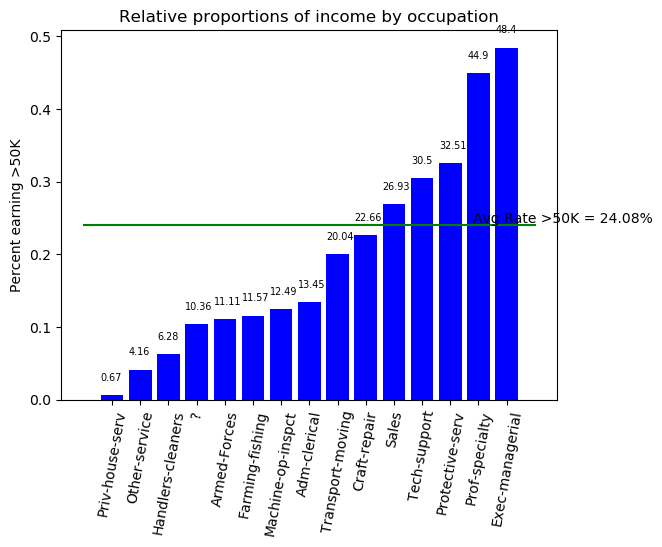

In [107]:
def bargraph(df, varname, over=True):
    counts = []
    if over:
        target = ">50K"
    else:
        target = "<=50K"
    vartargets = df[varname].loc[df["income"] == target].value_counts()
    vartargets = vartargets.to_dict()
    varall = df[varname].value_counts()
    varall = varall.to_dict()
    varcats = list(df[varname].unique())#.to_list()
    for v in varcats:
        temptarget = 0
        temptotal = 0
        if v in vartargets:
            temptarget = vartargets[v]
        if v in varall:
            temptotal = varall[v]
        counts.append((v, temptarget, temptotal))
    targetsum = 0
    totalsum = 0
    for i in range(len(counts)):
        targetsum += counts[i][1]
        totalsum += counts[i][2]
        counts[i] = (counts[i][0], counts[i][1]/(counts[i][2]+0.00001))
    list.sort(counts, key=lambda x: x[1])
    varcats = [x[0] for x in counts]
    ratios = np.array([x[1] for x in counts])
    poprate = round(targetsum/totalsum, 4)
    fig,ax = plt.subplots()
    if over:
        colorrate = poprate if poprate > 0.5 else 0.5
        mask = ratios >= colorrate
        colors = ["red" if i else "blue" for i in mask]
    else:
        colorrate = poprate if poprate < 0.5 else 0.5
        mask = ratios >= colorrate
        colors = ["blue" if i else "red" for i in mask]
    bars = ax.bar(varcats, ratios, color=colors)
    for b in bars:
        yval = b.get_height()
        plt.text(b.get_x(), yval+0.02, round(yval*100, 2), size='x-small')
    plt.xticks(range(len(varcats)), varcats, rotation=80)
    plt.plot([-1, len(varcats)], [poprate, poprate], 'g-')
    plt.text(len(varcats)-2.2, poprate+0.002, "Avg Rate {t} = {r}%".format(t = target, r = poprate*100))
    plt.ylabel("Percent earning {}".format(target))
    plt.title("Relative proportions of income by {}".format(varname))
    plt.show()

bargraph(maindf, "occupation")

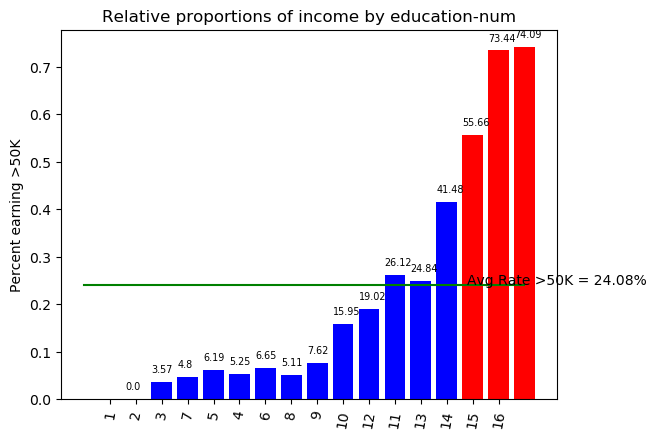

In [108]:
bargraph(maindf,"education-num", True)

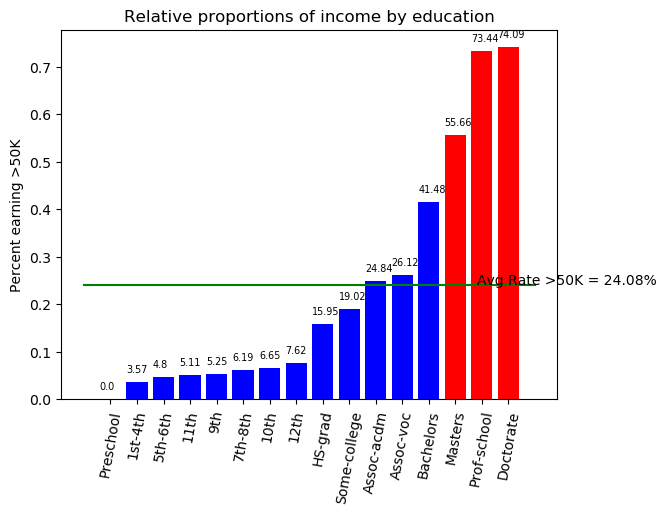

In [109]:
bargraph(maindf, "education")

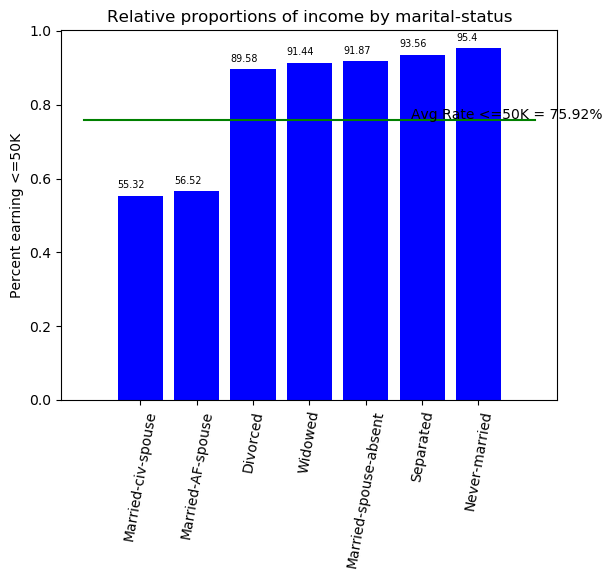

In [110]:
bargraph(maindf, "marital-status", False)

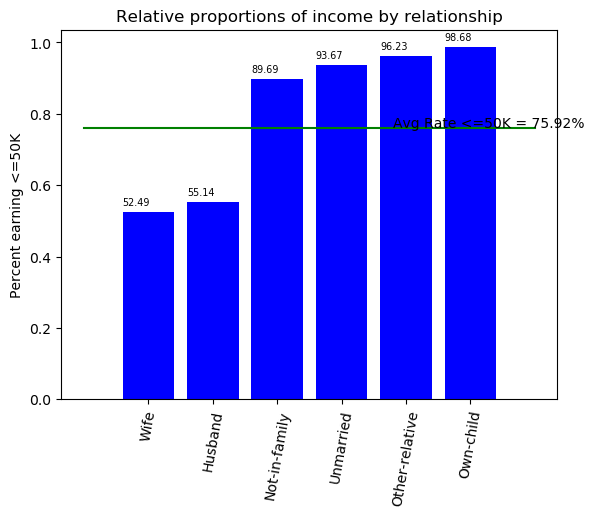

In [111]:
bargraph(maindf, "relationship", False)

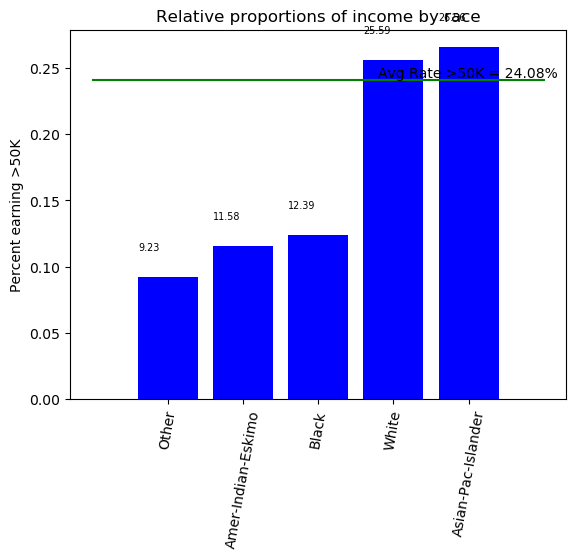

In [112]:
bargraph(maindf, "race")

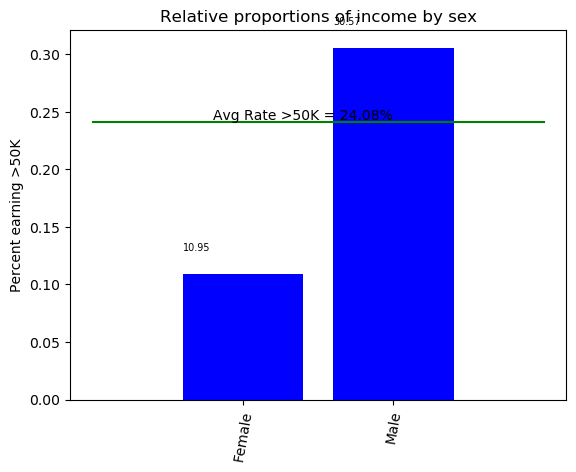

In [113]:
bargraph(maindf, "sex")

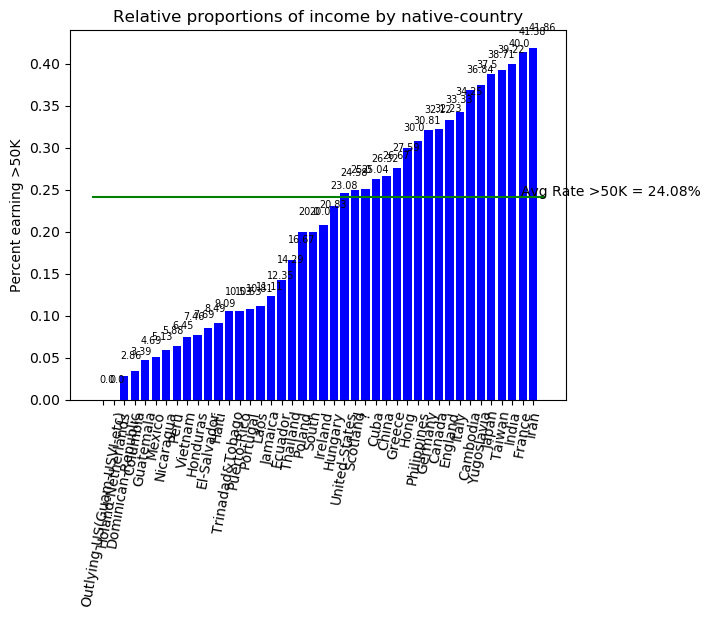

In [114]:
bargraph(maindf, "native-country")

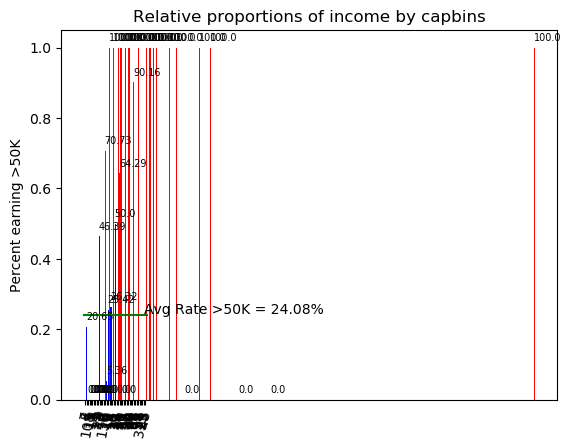

In [137]:
capgains = list(maindf["capital-gain"])
maxgain = max(capgains)
mingain = min(capgains)
N = max(capgains) - min(capgains)
k = 1 + math.ceil(math.sqrt(N))+mingain
newdf = maindf[['capital-gain','income']].copy()
newdf['capbins'] = 1 + newdf['capital-gain'] // k
bargraph(newdf, "capbins")